## Importing the libraries

In [19]:
import requests
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## json Request from API

In [20]:
HOST = 'https://api.meteo.lt/v1'
r = requests.get(HOST+'/places/vilnius/forecasts/long-term')
json = r.json()

In [21]:
time_stamp = 'Forecast_at_' + datetime.now().strftime("%Y_%m_%d_%H_%M") + '.csv'
print(time_stamp)

Forecast_at_2024_05_24_11_44.csv


## Converting json to dataframe

In [22]:
dataset = pd.DataFrame.from_dict(json['forecastTimestamps'])

## Checking for NaN values

In [23]:
dataset.isnull().values.any()

True

In [24]:
dataset.isnull().sum()

forecastTimeUtc         0
airTemperature          0
feelsLikeTemperature    0
windSpeed               0
windGust                0
windDirection           0
cloudCover              0
seaLevelPressure        0
relativeHumidity        4
totalPrecipitation      0
conditionCode           0
dtype: int64

## Saving dataframe to .csv file

In [25]:
dataset.to_csv(time_stamp, index=False)

## Plotting dataframe

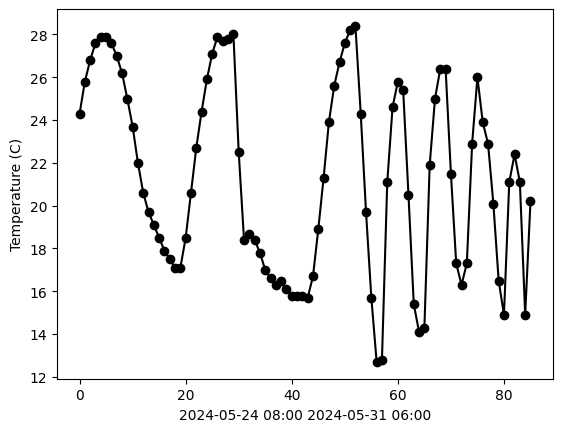

In [26]:
plt.plot(dataset['forecastTimeUtc'].index[:], dataset.iloc[:,1].values, color='black')
plt.scatter(dataset['forecastTimeUtc'].index[:], dataset.iloc[:,1].values, color='black')
plt.xlabel(dataset.iloc[0,0][0:-3] + " " + dataset.iloc[-1,0][0:-3])
plt.ylabel('Temperature (C)')
plt.show()

## Filtering dataframe by hour

In [27]:
# data_by_hour = dataset[dataset['forecastTimeUtc'].str.contains('00:00:00')]

In [28]:
# plt.plot(data_by_hour['forecastTimeUtc'].index[:56], data_by_hour['airTemperature'], color='red')
# plt.xlabel(dataset.iloc[0,0][0:11] + dataset.iloc[-1,0][0:10])
# plt.ylabel('Temperature (C)')
# plt.show()

## Splitting dataframe to X and y dataframes

In [29]:
X = dataset.iloc[:, 3:].values
y = dataset.iloc[:,1].values

## Encoding categorical data

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Filling missing dataframe values

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X)
X = imputer.transform(X)

## Splitting the dataset into the Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## Training the Random Forest Regression model on the Training set

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Visualising the Random Forest Regression results with dataframe results

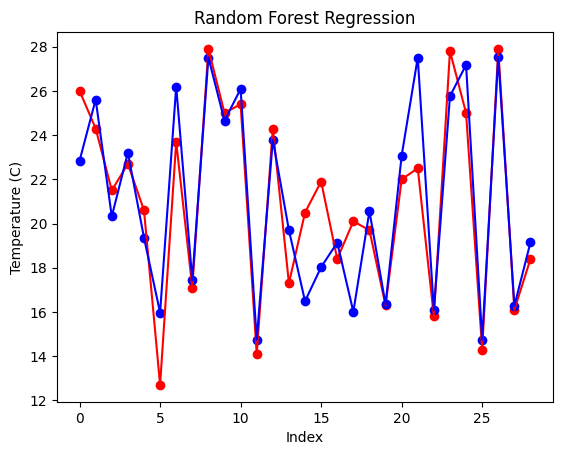

In [38]:
plt.scatter(dataset.index[0:len(y_test)], y_test, color = 'red')
plt.scatter(dataset.index[0:len(y_test)], regressor.predict(X_test), color = 'blue')
plt.plot(dataset.index[0:len(y_test)], y_test, color = 'red')
plt.plot(dataset.index[0:len(y_test)], regressor.predict(X_test), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.show()

## Predicting the Test set results

In [39]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[22.84 26.  ]
 [25.61 24.3 ]
 [20.32 21.5 ]
 [23.21 22.7 ]
 [19.36 20.6 ]
 [15.97 12.7 ]
 [26.2  23.7 ]
 [17.44 17.1 ]
 [27.51 27.9 ]
 [24.65 25.  ]
 [26.09 25.4 ]
 [14.74 14.1 ]
 [23.79 24.3 ]
 [19.7  17.3 ]
 [16.49 20.5 ]
 [18.03 21.9 ]
 [19.14 18.4 ]
 [16.01 20.1 ]
 [20.56 19.7 ]
 [16.34 16.3 ]
 [23.07 22.  ]
 [27.51 22.5 ]
 [16.08 15.8 ]
 [25.76 27.8 ]
 [27.18 25.  ]
 [14.74 14.3 ]
 [27.54 27.9 ]
 [16.28 16.1 ]
 [19.15 18.4 ]]


## Evaluating the Model Performance

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7670927562213987